/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/scipy/_lib/_util.py:1272: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: divide by zero encountered in dot
  c = dot(X, X_T.conj())
/Users/esthercaroline/Documents/Projects/UIUC/insper_su_2025/venv/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2911: RuntimeWarning: overflow enc

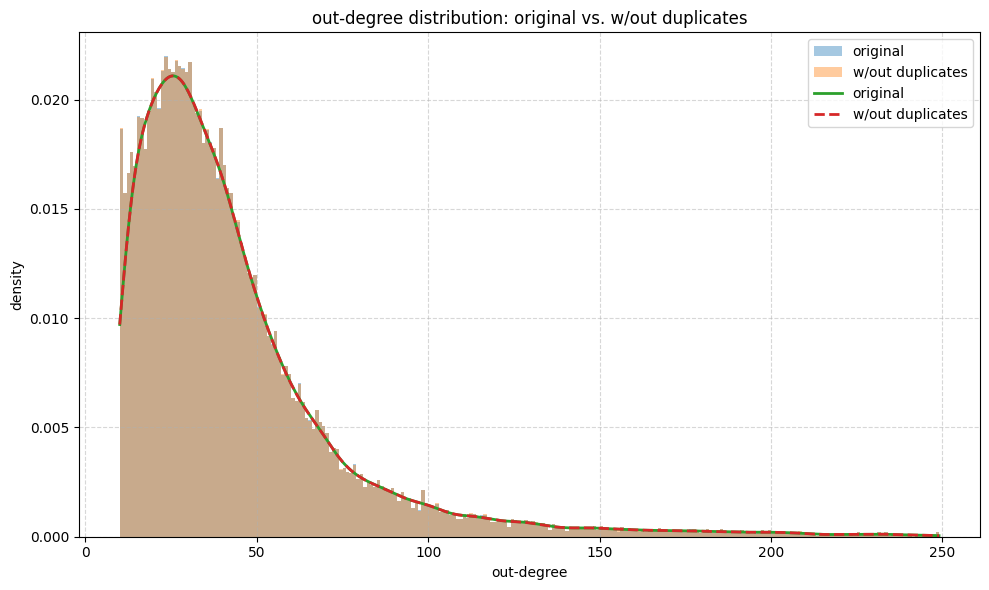

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


df = pd.read_csv('../outputs/pooled_5k_pubmed.csv')
df_unique = df.drop_duplicates(subset='#node_id', keep='first')

orig = df['out_degree']
uniq = df_unique['out_degree']

xmin = min(orig.min(), uniq.min())
xmax = max(orig.max(), uniq.max())
bins = np.arange(xmin, xmax + 1, 1) 

plt.figure(figsize=(10,6))
plt.hist(orig, bins=bins, density=True, alpha=0.4, label='original')
plt.hist(uniq, bins=bins, density=True, alpha=0.4, label='w/out duplicates')


kde_o = gaussian_kde(orig)
kde_u = gaussian_kde(uniq)
x = np.linspace(xmin, xmax, 1000)
plt.plot(x, kde_o(x), lw=2, label='original')
plt.plot(x, kde_u(x), lw=2, ls='--', label='w/out duplicates')


plt.title('out-degree distribution: original vs. w/out duplicates')
plt.xlabel('out-degree')
plt.ylabel('density')
plt.legend()
plt.grid(linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
